In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from scipy.stats import gaussian_kde
import seaborn as sns

#Lee el archivo CSV
df = pd.read_csv('NYC-BikeShare-2015-2017-combined.csv')

# Muestra las primeras 10  filas del DataFrame en modo tabla
print("Primeras filas del DataFrame:")
display(df.head(10))

#Evalua cuantos registros tiene el dataset en un inicio
num_registros = df.shape[0]
print(f"El dataset tiene {num_registros} registros inicialmente")

#Nota: fue necesario instalar la libreria scikit-learn para poder uar el sklear.preprocesing

Primeras filas del DataFrame:


,Unnamed: 0,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender,Trip_Duration_in_min
0,0,376,2015-10-01 00:16:26,2015-10-01 00:22:42,3212,Christ Hospital,40.734786,-74.050444,3207,Oakland Ave,40.737604,-74.052478,24470,Subscriber,1960.0,1,6
1,1,739,2015-10-01 00:27:12,2015-10-01 00:39:32,3207,Oakland Ave,40.737604,-74.052478,3212,Christ Hospital,40.734786,-74.050444,24481,Subscriber,1960.0,1,12
2,2,2714,2015-10-01 00:32:46,2015-10-01 01:18:01,3193,Lincoln Park,40.724605,-74.078406,3193,Lincoln Park,40.724605,-74.078406,24628,Subscriber,1983.0,1,45
3,3,275,2015-10-01 00:34:31,2015-10-01 00:39:06,3199,Newport Pkwy,40.728745,-74.032108,3187,Warren St,40.721124,-74.038051,24613,Subscriber,1975.0,1,5
4,4,561,2015-10-01 00:40:12,2015-10-01 00:49:33,3183,Exchange Place,40.716247,-74.033459,3192,Liberty Light Rail,40.711242,-74.055701,24668,Customer,1984.0,0,9
5,5,365,2015-10-01 00:41:46,2015-10-01 00:47:51,3198,Heights Elevator,40.748716,-74.040443,3215,Central Ave,40.746730,-74.049251,24644,Customer,1984.0,0,6
6,6,139,2015-10-01 00:43:44,2015-10-01 00:46:03,3206,Hilltop,40.731169,-74.057574,3195,Sip Ave,40.730743,-74.063784,24482,Subscriber,1988.0,1,2
7,7,1299,2015-10-01 01:10:10,2015-10-01 01:31:50,3197,North St,40.752559,-74.044725,3215,Central Ave,40.746730,-74.049251,24550,Customer,1984.0,0,22
8,8,647,2015-10-01 02:01:36,2015-10-01 02:12:24,3213,Van Vorst Park,40.718489,-74.047727,3190,Garfield Ave Station,40.710467,-74.070039,24650,Subscriber,1988.0,1,11
9,9,233,2015-10-01 04:43:33,2015-10-01 04:47:27,3194,McGinley Square,40.725340,-74.067622,3195,Sip Ave,40.730743,-74.063784,24584,Subscriber,1978.0,2,4


El dataset tiene 735502 registros inicialmente


In [14]:
# Asigna el nombre 'ID' a la primera columna si no tiene nombre
if df.columns[0] == '':
    df.columns.values[0] = 'ID'
else:
    df.rename(columns={df.columns[0]: 'ID'}, inplace=True)

display(df.head(10))

,ID,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender,Trip_Duration_in_min
0,0,376,2015-10-01 00:16:26,2015-10-01 00:22:42,3212,Christ Hospital,40.734786,-74.050444,3207,Oakland Ave,40.737604,-74.052478,24470,Subscriber,1960.0,1,6
1,1,739,2015-10-01 00:27:12,2015-10-01 00:39:32,3207,Oakland Ave,40.737604,-74.052478,3212,Christ Hospital,40.734786,-74.050444,24481,Subscriber,1960.0,1,12
2,2,2714,2015-10-01 00:32:46,2015-10-01 01:18:01,3193,Lincoln Park,40.724605,-74.078406,3193,Lincoln Park,40.724605,-74.078406,24628,Subscriber,1983.0,1,45
3,3,275,2015-10-01 00:34:31,2015-10-01 00:39:06,3199,Newport Pkwy,40.728745,-74.032108,3187,Warren St,40.721124,-74.038051,24613,Subscriber,1975.0,1,5
4,4,561,2015-10-01 00:40:12,2015-10-01 00:49:33,3183,Exchange Place,40.716247,-74.033459,3192,Liberty Light Rail,40.711242,-74.055701,24668,Customer,1984.0,0,9
5,5,365,2015-10-01 00:41:46,2015-10-01 00:47:51,3198,Heights Elevator,40.748716,-74.040443,3215,Central Ave,40.746730,-74.049251,24644,Customer,1984.0,0,6
6,6,139,2015-10-01 00:43:44,2015-10-01 00:46:03,3206,Hilltop,40.731169,-74.057574,3195,Sip Ave,40.730743,-74.063784,24482,Subscriber,1988.0,1,2
7,7,1299,2015-10-01 01:10:10,2015-10-01 01:31:50,3197,North St,40.752559,-74.044725,3215,Central Ave,40.746730,-74.049251,24550,Customer,1984.0,0,22
8,8,647,2015-10-01 02:01:36,2015-10-01 02:12:24,3213,Van Vorst Park,40.718489,-74.047727,3190,Garfield Ave Station,40.710467,-74.070039,24650,Subscriber,1988.0,1,11
9,9,233,2015-10-01 04:43:33,2015-10-01 04:47:27,3194,McGinley Square,40.725340,-74.067622,3195,Sip Ave,40.730743,-74.063784,24584,Subscriber,1978.0,2,4


        Birth Year   Age
0           1960.0  64.0
1           1960.0  64.0
2           1983.0  41.0
3           1975.0  49.0
4           1984.0  40.0
...            ...   ...
735497      1970.0  54.0
735498      1976.0  48.0
735499      1956.0  68.0
735500      1984.0  40.0
735501      1988.0  36.0

[735502 rows x 2 columns]


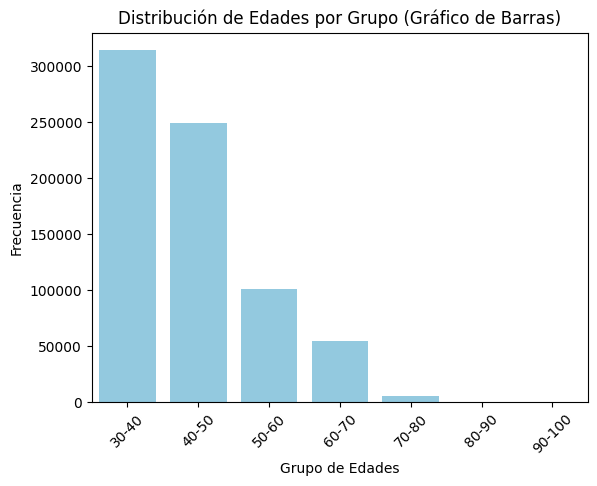

In [15]:
# Calcular la edad
current_year = 2024
df['Age'] = current_year - df['Birth Year']

# Mostrar el DataFrame resultante
print(df[['Birth Year', 'Age']])

# Crea grupos de edades (por ejemplo, 30-40, 40-50, etc.)
age_bins = [30, 40, 50, 60, 70, 80, 90, 100]
labels = [f"{start}-{end}" for start, end in zip(age_bins[:-1], age_bins[1:])]

# Agrega una columna con los grupos de edades
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=labels)

# Crea el gráfico de barras
sns.countplot(data=df, x='Age Group', color="skyblue")
plt.xlabel("Grupo de Edades")
plt.ylabel("Frecuencia")
plt.title("Distribución de Edades por Grupo (Gráfico de Barras)")
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor legibilidad
plt.show()


In [16]:

# Calcula la duración de los viajes en minutos
df['Trip Duration (minutes)'] = df['Trip Duration'] / 60

# Encuentra los viajes más largos
longest_trips = df.nlargest(5, 'Trip Duration (minutes)')

# Encuentra los pares de ciudades de origen y destino más comunes
city_pairs = df.groupby(['Start Station Name', 'End Station Name']).size().reset_index(name='Count')
most_common_pairs = city_pairs.nlargest(5, 'Count')

# Selecciona las columnas a mostrar, excluyendo la columna "ID"
columns_to_print = [col for col in most_common_pairs.columns if col != 'ID']

print("\nLos 5 pares de ciudades de origen y destino más comunes:")
display(most_common_pairs[columns_to_print])



Los 5 pares de ciudades de origen y destino más comunes:


,Start Station Name,End Station Name,Count
810,Hamilton Park,Grove St PATH,17911
220,Brunswick St,Grove St PATH,16747
1388,McGinley Square,Sip Ave,13205
760,Grove St PATH,Hamilton Park,12712
1994,Van Vorst Park,Grove St PATH,11975


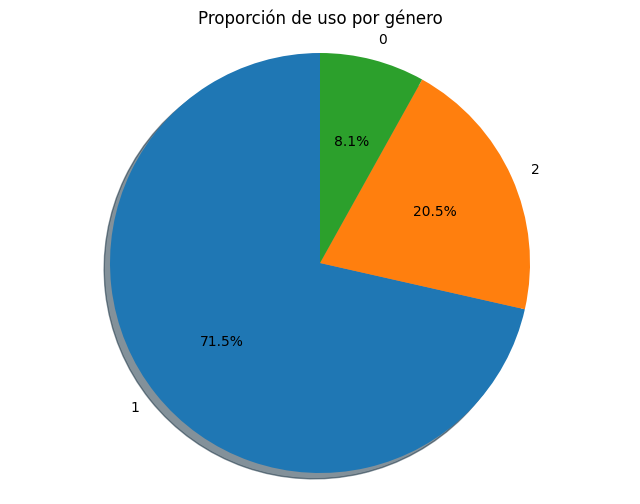

In [17]:

# Calcula la cantidad de viajes por género
viajes_por_genero = df['Gender'].value_counts()

# Crea el gráfico de torta
plt.figure(figsize=(8, 6))
plt.pie(viajes_por_genero, labels=viajes_por_genero.index, autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Proporción de uso por género')
plt.axis('equal')  # Para que el gráfico sea circular

# Mostrar el gráfico
plt.show()

#Como puedo saber que indica cada numero? cual es la convencion?